# Lab Thursday October 27

Please put the name and student ID of each group member here:


# Review

## Generating random functions using numpy.radom package

### Uniform random numbers
* `random()` generates a single random number in the interval $[0,1)$
* `random(n)` generates n random numbers in the interval $[0,1)$
* `rand(m,n)` generates an $m\times n$ matrix of random numbers in $[0,1)$

### Normal random numbers
* `normal(loc=0, scale=1)` draws a normal random number with a mean **loc** and a standard deviation **scale**
* `normal(loc, scale, size=n)` draws an array of n normal random numbers
* `normal(loc, scale, size=[m,n])` draws an $m\times n$ matrix of normal random numbers

### Binomial random numbers
* `binomial(n, p)` draw a single binomial random number with n trials and a success probability  𝑝 
* `binomial(n, p, size)` draws size binomial random numbers and return as an array
* `binomial(n, p, [m,n])` fills an  𝑚×𝑛  matrix of with binomial random numbers

In [12]:
from numpy.random import random, rand, normal, binomial
print(random())

# generate 10 random numbers
print(random(10))

#generate a 10x2 random matrix
X = rand(3, 2)
print(X)

N = normal(0, 1, size=[3,2])
print(N)

B = binomial(10, 0.5, size=10)
print(B)

0.6094680432554669
[0.96279887 0.02132688 0.23950574 0.65104884 0.1968413  0.05149934
 0.43037934 0.09915026 0.30739683 0.8362458 ]
[[0.15032306 0.69152432]
 [0.79225532 0.16811758]
 [0.89364466 0.64379792]]
[[-2.36491974 -0.50042285]
 [-0.29680557 -0.72194533]
 [-1.81953954 -1.44998089]]
[6 6 4 7 5 6 4 6 7 5]


# Brownian motion (diffusion)
Let $B_t$ a continuous random variable for each time $t$,
$$B_{t_2}-B_{t_1}\sim\text{Normal}(0, (t_2-t_1)\sigma^2):=X_i$$
where $\sigma$ is called the volitility, and $B_0$ is the initial position.

This stochastic process is called the Brownnian motion. 
* It is typilcally used to model random motion of a particle, the diffusion process, or random movement of animals. 
$$
B_t = B_{t_0} + (B_{t_1} - B_{t_0}) + (B_{t_2}-B_{t_1}) + \dots=B_0 + X_1 + X_2 + \dots
$$


## Simulate a Brownian motion
We can simulate the Brownian motion at discrete time points $t_0$, $t_1$, ..., $t_n$.
  * for simplicity, these time points can be equally spaced, i.e., $t_{i+1}-t_{i}=h$
  * By definition, $\{B_{t_i}\}_{i=0^n}$ is a cumulative sum of $n$ normal random variables with mean $0$ and variance $h\sigma^2$


In [2]:
from numpy import zeros, cumsum, diff, sqrt
# t is an array of time points, B0=B(t[0])
def Brownian(t, sigma, B0):
    n = len(t)
    N = zeros(n)
    # compute the time steps t[1]-t[0], t[2]-t[1], ...
    dt = diff(t)
    # initial position
    N[0] = B0
    # the increments, i.e., the step sizes
    N[1:n] = normal(0, sigma*sqrt(dt), n-1)
    return cumsum(N)


# Example 1: Simulate a stock price
let $S_t$ be the price of a stock at time $t$, then $\ln S_t$ can be modeled as a Brownian motion
* That is, we can simulation a Brownian motion $B_t$, then $S_t=S_0e^{B_t}$ 

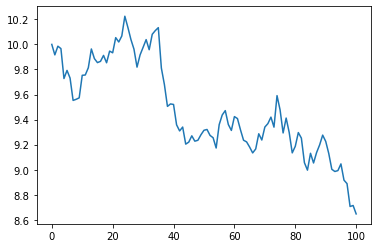

In [3]:
from numpy import exp, linspace
S0 = 10
t = linspace(0, 100, 101)
S = exp(Brownian(t, 0.01, 0))*S0
from matplotlib.pyplot import plot
plot(t, S)

# Example 2: Simulate an SIS epidemic

Suppose a disease does not convey immunity. An infectious individual becomes susceptible immediately after recovery. Let 
* $S(t)$ and $I(t)$ be the number of susceptible and infectious individuals
* N=S(t)+I(t) is the total population.

On each day
* a susceptible individual is infected with probability $p=1-e^{-\beta I(t)/N}$
  * Thus the total number of new infections on day $t$ is
  $$ X(t) \sim Binomial(S(t), p)$$
* an infectious individual recovers with  probability $\gamma$ on each day.
  * Thus the total number of recovery on day $t$ is
  $$ Y(t) \sim Binomial(I(t), \gamma)$$
\begin{align*}
S(t+1)-S(t) & = - X(t) + Y(t)\\
I(t+1) - I(t) = X(t)- Y(t)
\end{align*}

Because the total population $N$ is a constant, we only need to calculate $I(t)$, and $S(t)=N-I(t)$. We return the new infections X(t) in each day.

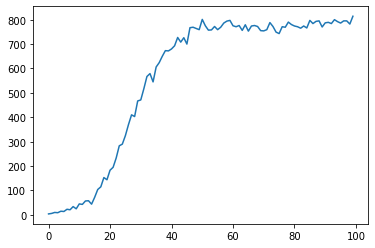

In [18]:
# Parameters
# T: the number of days to simulate
# I0: the initial number of infectious individuals I(0)
# beta: transmission rate
# gamma: recovery rate
# N: total population
def SIS(T, I0, beta, gamma, N):
    X = zeros(T)
    I = I0
    S = N - I
    for t in range(T):
        X[t] = binomial(S, 1-exp(-beta*I/N))
        Y = binomial(I, gamma)
        I = I + X[t] - Y
    return X

from numpy import arange
X = SIS(100, 10, 0.4, 0.2, 1000)
plot(arange(0, 100), X)

# Group Assignments

## Question 1. Two Dimensional Brownian Motion

To simulate a 2-dimensional brownian motion, at time $t_i$, we randomly choose a direction $\theta\sim$Uniform$(0,2\pi)$, and move in that direction with a random step size $r\sim$Normal$(0,h\sigma^2)$ 

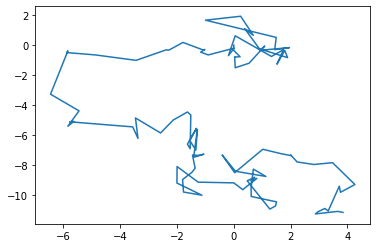

In [5]:
from math import pi
from numpy import sin, cos, array
from numpy.random import random

def Brownian2d(t, sigma, B0 = array([0, 0])):
    n = len(t)
    dt = diff(t)
    B = zeros([n,2])
    B[0,:] = B0
    r = normal(0, sigma*sqrt(dt), n-1)
    theta = random(n-1)*2*pi
    for i in range(1, n):
        B[i,0] = B[i-1,0] + r[i-1]*cos(theta[i-1]) 
        B[i,1] = B[i-1,1] + r[i-1]*sin(theta[i-1]) 
    return B

B = Brownian2d(t, 1)
plot(B[:,0], B[:,1])

# Question 2
Let $N(t)$ be the size of a bacteria population on day $t$. On each day, an individual divides into two with probability $b$, and survives to the next day with a probability 
$$ d = se^{-aN(t)}\right$$

Suppose $N(0)=100$, $b=0.5$, $s=0.8$, $a=0.01$. Simulate the population dynamics for 100 days, plot the population size $N(t)$ as a function of time $t$.

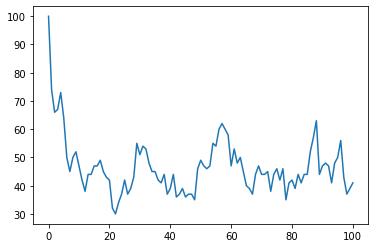

In [21]:
T = 100
N0 = 100
b = 0.5
s = 0.8
a = 0.01

N = zeros(T+1)
N[0] = N0
for t in range(T):
    d = s * exp(-a*N[t])
    N[t+1] = binomial(N[t], b) + binomial(N[t], d)

from numpy import arange
plot(arange(0, T+1), N)

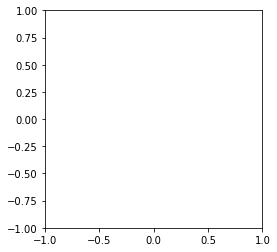

In [6]:
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import subplots
from numpy import linspace, sin, cos
from math import pi

# create a plot to animate, ax is the axis object
fig, ax =subplots()

# set the limits of the axes
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_aspect(1)

# these two lines define a function circle that produces the xand y coordinates of points on a circle
# centered xc and yc, with a radius r
theta = linspace(0, 2*pi, 100)
circle = lambda xc, yc, r: [r*cos(theta)+xc,r*sin(theta)+yc]

def update(frame):
    # generate two uniform random numbers between 0 and 1, multiple by two than subtract 1.
    # this converts the uniform random numbers to a number between -1 and 1.
    xc, yc = 2*random(2)-1
    x, y = circle(xc, yc, 0.01)
    ax.plot(x, y, '-b')

anim = FuncAnimation(fig, update, frames=range(0, 20))


In [7]:
from IPython.display import HTML
HTML(anim.to_html5_video())